In [43]:
from prepare_module import X_y_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [28]:
# getting clean data
df = pd.read_csv('../data/Mayor_s_Action_Center_Service_Cases_Clean.csv', index_col=0)
target = 'is_less_than_one_week'

train, validate, test,\
     X_train,y_train,\
         X_validate, y_validate,\
              X_test, y_test = X_y_split(df, target=target, stratify=True)

## Part 1 Micro
1. **Univariate**
    1. Which keywords has the most cases?
        * Trash
    1. What are the most frequent reasons for the requests (the subcategories)?
        * Stolen
1. **Bivariate**
    1. What is the relationship between the type of request(subcategory) and the response time?
    1. What is the relationship between the open date and the response time?
    1. What is the relationship between the year it was creaetd and the response time?
    1. What is the relationship between the month it was created and the response time?
    1. What is the relationship between the week it was created and the response time?
    1. What is the relationship between the weekday it was created and the response time?
    1. What is the relationship between the zip code of the incident and the response time?

### Univariate

In [9]:
# getting the shape
print(df.shape)
df.head(1)

(772962, 12)


,keyword,subcategory,township,zip,council_district,origin,num_open_cases,year_created,month_created,week_created,weekday_created,is_less_than_one_week
0,Chuckhole,Street (Chuckhole),CENTER,46225,16,RequestIndy Online,0,2015,6,23,0,True


In [30]:
# What keyowrd has the most cases?
train.keyword.value_counts()

trash = train.loc[train['keyword'] == 'Trash']

trash.subcategory.value_counts()

subcategory
96 Gal Cart - Stolen         21543
96 Gal Cart - Other          18613
96 Gal Trash (Missed)        14547
96 Gal Trash (Block)         10747
Heavy                         8907
96 Gal Cart - Buy             5492
Complaint/Crew                4382
96 Gal Cart - New Request     2971
Freon                         1665
Recycling New Service         1664
Hand Collection (Missed)      1053
Leaves                         794
Hand Collection (Block)        586
Property Damage                161
Name: count, dtype: int64

In [48]:
# trash[target].plot.count()

### Bivariate

##### **What is the relationship between the type of request(subcategory) and the response time?**

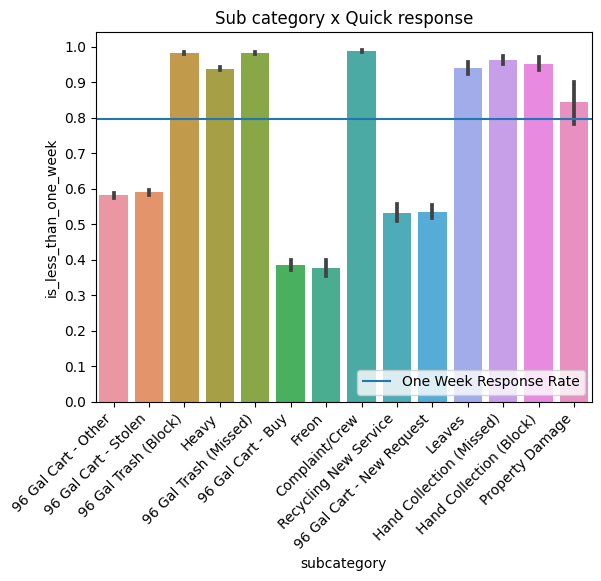

In [68]:
# getting target
# target = trash['is_less_than_one_week']
y_ticks = [i/10.0 for i in range(0,11)]
# getting stacked bar chart to show the relationships
plt.title('Sub category x Quick response')
sns.barplot(data=trash, x='subcategory', y=target)
one_week_response_rate = train[target].mean()
plt.axhline(one_week_response_rate, label='One Week Response Rate')
plt.xticks(rotation = 45, ha='right')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.show()

**Takeaways:**
* There seems to be a clear difference between each subcategory and the response rate

**Actions:**
* Run a chi2 hypothesis test to see

In [44]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "a reponse in less than a week and the subcategory are independent"
alternative_hypothesis = "there is a relationship between subcategory and fast reponse"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(trash.subcategory, trash[target])

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that fast reponse and the subcategory are independent
Sufficient evidence to move forward understanding that there is a relationship between subcategory and fast reponse


0.0

##### What is the relationship between the open date and the response time?
Note: There isnt a way to run a stats test on this data Come back later

##### What is the relationship between the year it was created and the response time?
Note: I don't think it is uselful to use the year becasue the year will never repeat

In [ ]:
plt.title('Reponse Rate by Year')
sns.barplot(data=trash, x='year_created', y=target)
one_week_response_rate = train[target].mean()
plt.axhline(one_week_response_rate, label='One Week Response Rate')
plt.xticks(rotation = 45, ha='right')
plt.legend(loc='lower right')
plt.show()

##### **What is the relationship between the month it was created and the response time?**
Note: there is likely a relatio nship between month it was created and week it was created


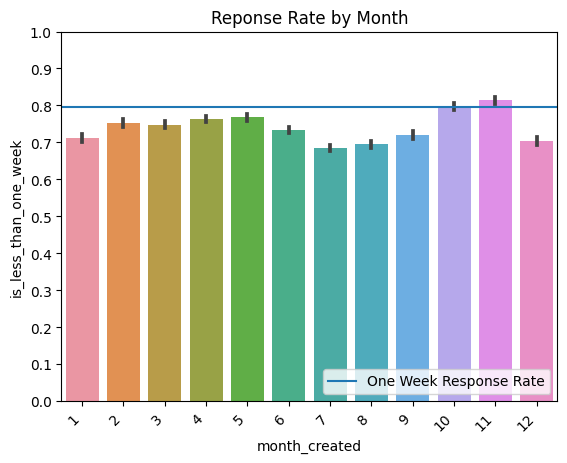

In [69]:
y_ticks = [i/10.0 for i in range(0,11)]

plt.title('Reponse Rate by Month')
sns.barplot(data=trash, x='month_created', y=target)
one_week_response_rate = train[target].mean()
plt.axhline(one_week_response_rate, label='One Week Response Rate')
plt.xticks(rotation = 45, ha='right')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.show()

**Note**
* There is a slight shift from the summer to the fall/winter months which may be worth noting

**Action:**
* Run a chisqured test to see

In [73]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "a reponse in less than a week and the month of the request are independent"
alternative_hypothesis = "there is a relationship between  month of the request and fast reponse"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(trash.month_created, trash[target])

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

p

Reject the null hypothesis that a reponse in less than a week and the month of the request are independent
Sufficient evidence to move forward understanding that there is a relationship between  month of the request and fast reponse


1.199673728222034e-147

##### **What is the relationship between the week it was created and the response time?**


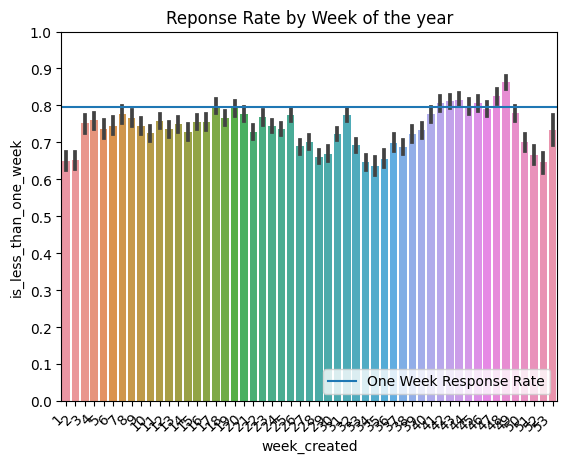

In [71]:
y_ticks = [i/10.0 for i in range(0,11)]

plt.title('Reponse Rate by Week of the year')
sns.barplot(data=trash, x='week_created', y=target)
one_week_response_rate = train[target].mean()
plt.axhline(one_week_response_rate, label='One Week Response Rate')
plt.xticks(rotation = 45, ha='right')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.show()

**Note:**
* This has a direct correlation with the month, with more variablility here than in the month
* If I'm not mistaken, the weeks will always line up with the months so selecting the week will likely provide better results

**Actions:**
* Chi2

In [74]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "a reponse in less than a week and the week of the request are independent"
alternative_hypothesis = "there is a relationship between  week of the request and fast reponse"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(trash.week_created, trash[target])

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

p

Reject the null hypothesis that a reponse in less than a week and the week of the request are independent
Sufficient evidence to move forward understanding that there is a relationship between  week of the request and fast reponse


1.3656667589590609e-239

##### **What is the relationship between the weekday it was created and the response time?**


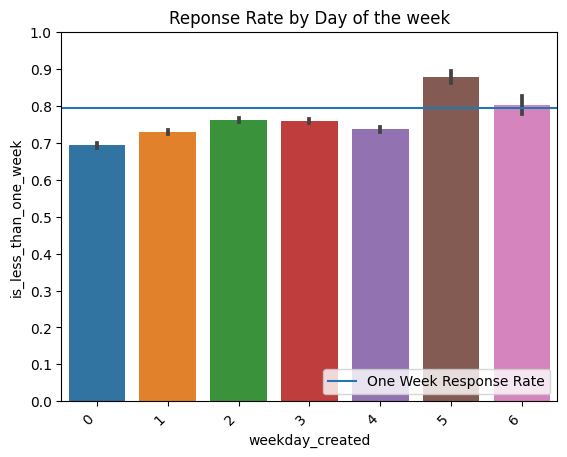

In [75]:
y_ticks = [i/10.0 for i in range(0,11)]

plt.title('Reponse Rate by Day of the week')
sns.barplot(data=trash, x='weekday_created', y=target)
one_week_response_rate = train[target].mean()
plt.axhline(one_week_response_rate, label='One Week Response Rate')
plt.xticks(rotation = 45, ha='right')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.show()

**Notes:**
* There appears to be a slight change that can be examined
* I don't know which day is which
    * From docs 'The day of the week with Monday=0, Sunday=6.'

**Actions:**
* chi2

In [76]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "a reponse in less than a week and the weekday the request is created are independent"
alternative_hypothesis = "there is a relationship between the weekday the request is created and fast reponse"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(trash.weekday_created, trash[target])

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

p

Reject the null hypothesis that a reponse in less than a week and the weekday the request is created are independent
Sufficient evidence to move forward understanding that there is a relationship between the weekday the request is created and fast reponse


4.449611477680137e-100

##### **What is the relationship between the zip code of the incident and the response time?**

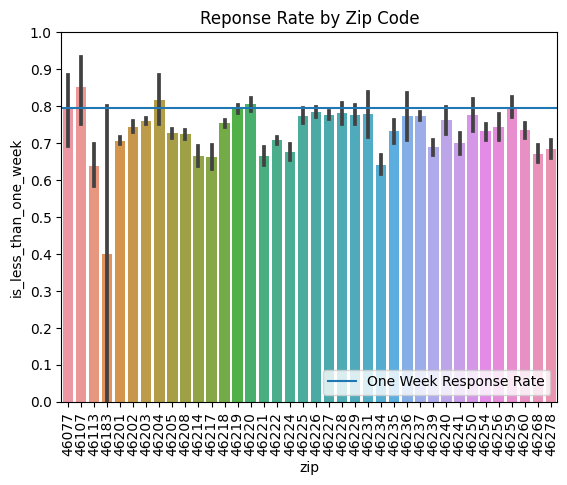

In [79]:
y_ticks = [i/10.0 for i in range(0,11)]

plt.title('Reponse Rate by Zip Code')
sns.barplot(data=trash, x='zip', y=target)
one_week_response_rate = train[target].mean()
plt.axhline(one_week_response_rate, label='One Week Response Rate')
plt.xticks(rotation = 90)
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.show()

**Notes**
* Very clear differences

**Actions:**
* chi2


In [81]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "a reponse in less than a week and the zip code of the request are independent"
alternative_hypothesis = "there is a relationship between the zip code of the request and fast reponse"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(trash.zip, trash[target])

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

p

Reject the null hypothesis that a reponse in less than a week and the zip code of the request are independent
Sufficient evidence to move forward understanding that there is a relationship between the zip code of the request and fast reponse


1.9104871472455576e-130

#### What is the relationship between the number of open cases and response rate?

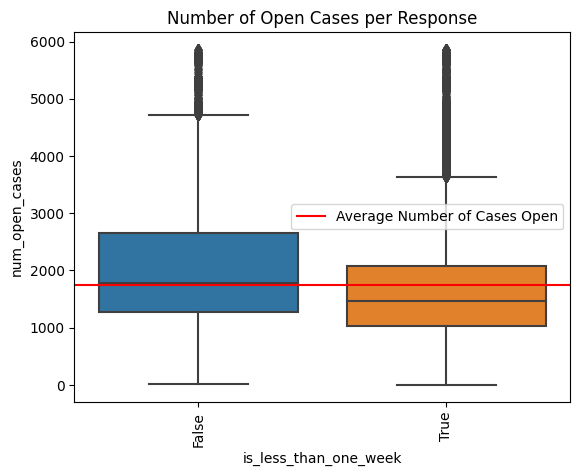

In [85]:
plt.title('Number of Open Cases per Response')
sns.boxplot(data=train, x=target, y='num_open_cases')
avg_num_cases_open = train['num_open_cases'].mean()
plt.axhline(avg_num_cases_open, label='Average Number of Cases Open', color='r')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

**Notes:**
* There is a clear difference

**Actions**
* Investigate the outliers
* Find the distributuion of the num open cases
* Run appropriate stats test

In [ ]:
# Let's run a independtn t-test squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "a response in less than a week and the zip code of the request are independent"
alternative_hypothesis = "there is a relationship between the zip code of the request and fast reponse"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(trash.zip, trash[target])

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

p

## Part 2 - Micro
1. **Multivariate**
    1. TBD

# Functions